In [60]:
#!pip install sounddevice
#!pip install soundfile
#!pip install librosa

In [61]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from skimage import io
import math
import sounddevice as sd
import soundfile as sf
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy
from IPython.display import Audio, display
import numpy as np
from scipy import ndimage

C:\Python\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


## 1. We know that speech signal is one dimensional vector. Different vector transformations can be applied on the speech signal to enhance its quality. Explore the following vector transformations on the speech signal.

### 1. Record your voice signal for 30 seconds (speak slow and record) and play it in python.

In [2]:
# Use sounddevice library to record the audio 
duration=30
fs=8000  #44000Hhz
my_record=sd.rec(fs*duration,samplerate=fs,channels=1)
sd.wait()

In [10]:
sd.play(my_record,fs)

I spoke about BCG Matrix Intro


In [17]:
sf.write("my_record.mp3",my_record,fs)

In [62]:
my_record, fs = sf.read("my_record.mp3")
Audio(data="my_record.mp3", autoplay=False)

In [63]:
print("I spoke about BCG Matrix Intro")

I spoke about BCG Matrix Intro


### 2. Print the shape of the signal. Is it a 1D vector ?

In [64]:
audio_file = "my_record.mp3"
audio, sr = librosa.load(audio_file, sr=None)


print("Shape of audio data:", audio.shape)
print("Sampling rate:", sr)

Shape of audio data: (240000,)
Sampling rate: 8000


### 3. Plot the signal. Can u able to roughly tell how many words/sentences spoken?

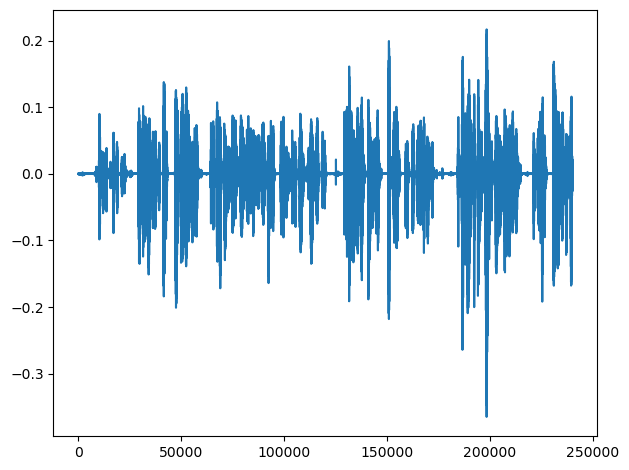

In [65]:
plt.plot(my_record)
plt.tight_layout()
plt.show()

### 4. Take only the first 15 seconds of your speech signal

In [66]:
trim_record = my_record[0*fs:15*fs]
trim_record.shape

(120000,)

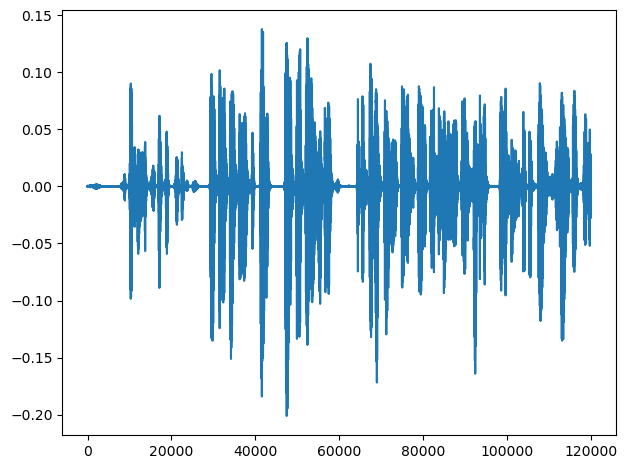

In [67]:
plt.plot(trim_record)
plt.tight_layout()
plt.show()

### 5. Down sample the speech vector by 2 (Pick one sample for every two sample)

In [68]:
down_sample_recording = scipy.signal.resample(trim_record, len(trim_record)//2)

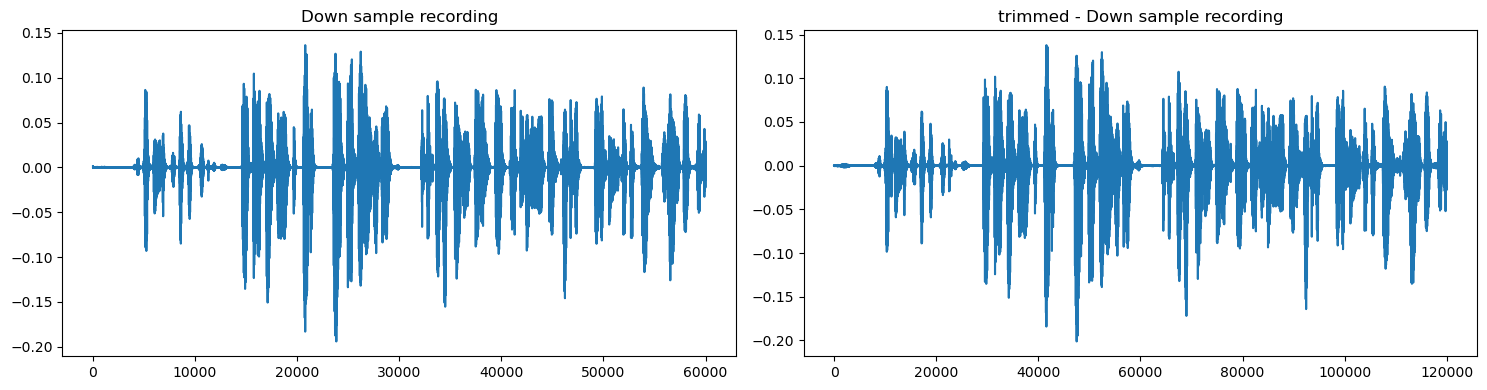

In [69]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,4))

axes[0].plot(down_sample_recording)
axes[0].set_title('Down sample recording')

axes[1].plot(trim_record)
axes[1].set_title('trimmed - Down sample recording')
plt.tight_layout()
plt.show()

### 6. Upsample the speech vector by 2 (Introduce one sample newly between every two sample)

In [70]:
up_sample_recording = scipy.signal.resample(trim_record, len(trim_record)*2)

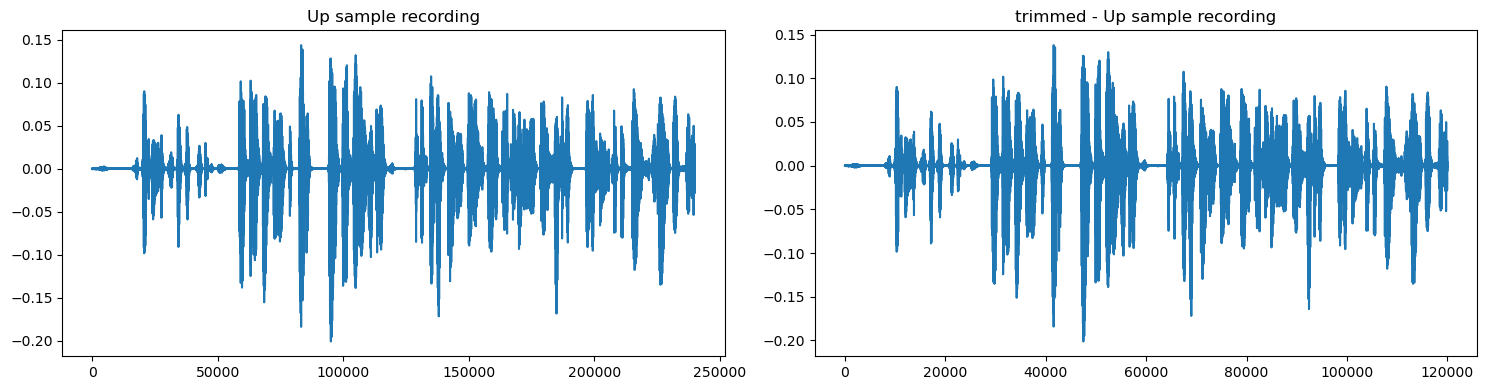

In [71]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,4))

axes[0].plot(up_sample_recording)
axes[0].set_title('Up sample recording')

axes[1].plot(trim_record)
axes[1].set_title('trimmed - Up sample recording')
plt.tight_layout()
plt.show()

### 7. Apply the following transformations on the speech signal and try to hear to

__a. 3*Speech signal__

__b. 0.5*Speech signal__

__c. exp(0.5*speech signal)__

__d. ln(speech signal)__

__e. Cos (Speech Signal)__

__f. Speech signal + normal_random_noise of same length of speech signal__

In [72]:
transformed_signal_3x = 3 * my_record
transformed_signal_05x = 0.5 * my_record
transformed_signal_exp = np.exp(0.5 * my_record)
transformed_signal_ln = np.log(np.clip(my_record, a_min=1e-10, a_max=None))
transformed_signal_cos = np.cos(my_record)
noise = np.random.normal(0, 0.01, my_record.shape)
transformed_signal_noise = my_record + noise

signals = [
    ("Original", my_record),
    ("3x Signal", transformed_signal_3x),
    ("0.5x Signal", transformed_signal_05x),
    ("exp(0.5x Signal)", transformed_signal_exp),
    ("ln(Signal)", transformed_signal_ln),
    ("Cos(Signal)", transformed_signal_cos),
    ("Signal + Noise", transformed_signal_noise)
]

In [73]:
for i, signal in signals:
    file = f'{i.replace(" ","_").replace("(", "").replace(")", "")}.wav'
    file,fs,signal.astype(np.float32)
    print(f'Playing {i}')
    sd.play(signal,fs)
    sd.wait()
    print(f"Playing stop {i}")

Playing Original
Playing stop Original
Playing 3x Signal
Playing stop 3x Signal
Playing 0.5x Signal
Playing stop 0.5x Signal
Playing exp(0.5x Signal)
Playing stop exp(0.5x Signal)
Playing ln(Signal)
Playing stop ln(Signal)
Playing Cos(Signal)
Playing stop Cos(Signal)
Playing Signal + Noise
Playing stop Signal + Noise


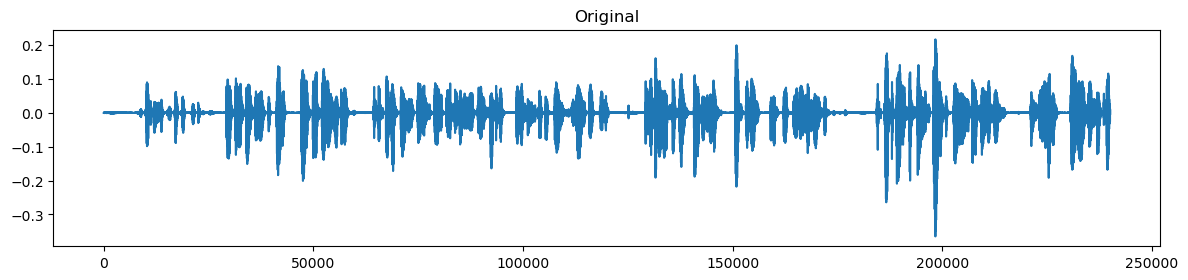

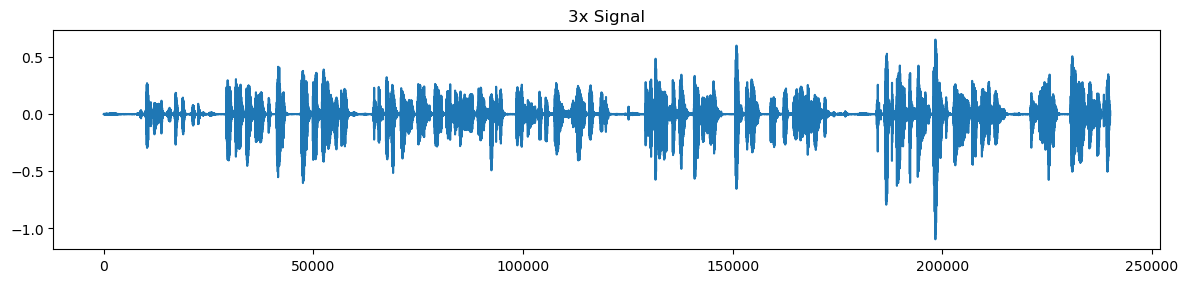

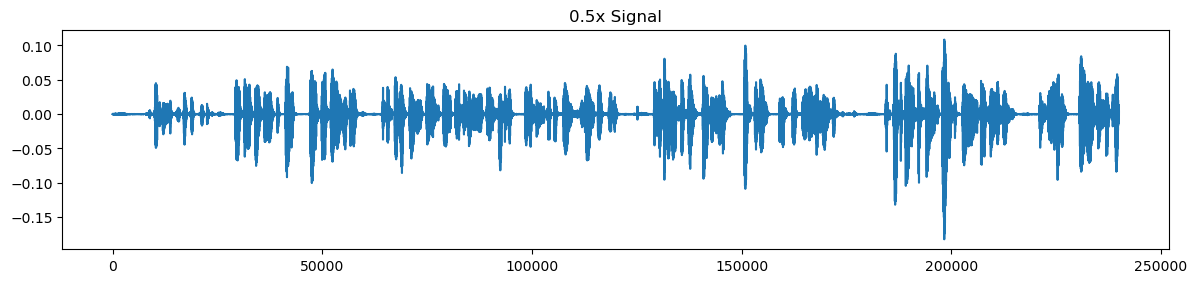

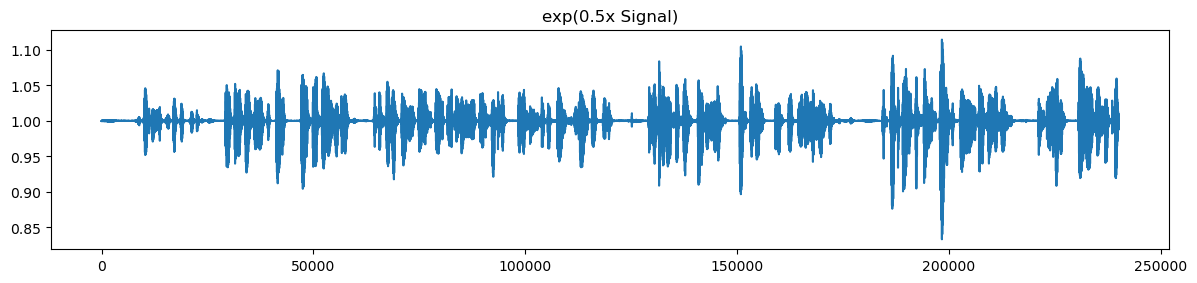

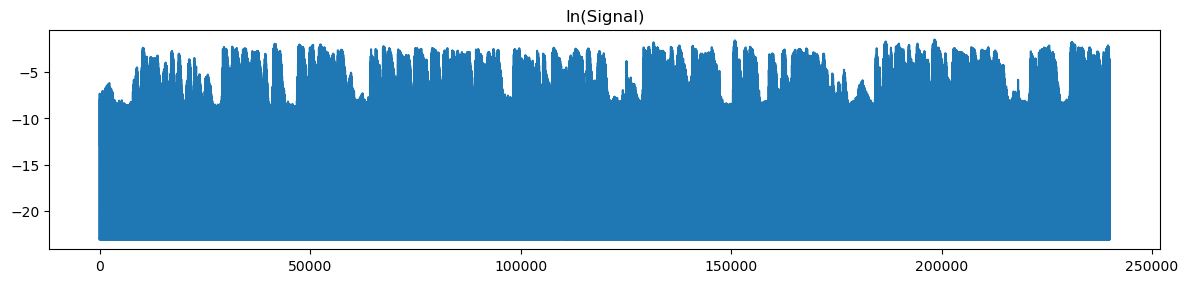

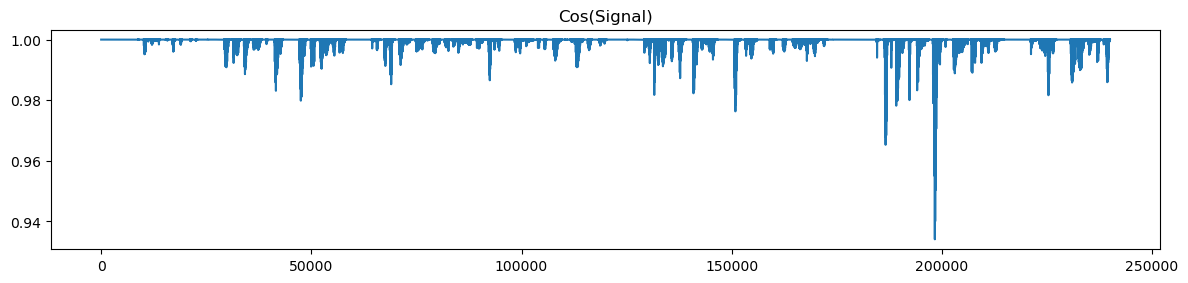

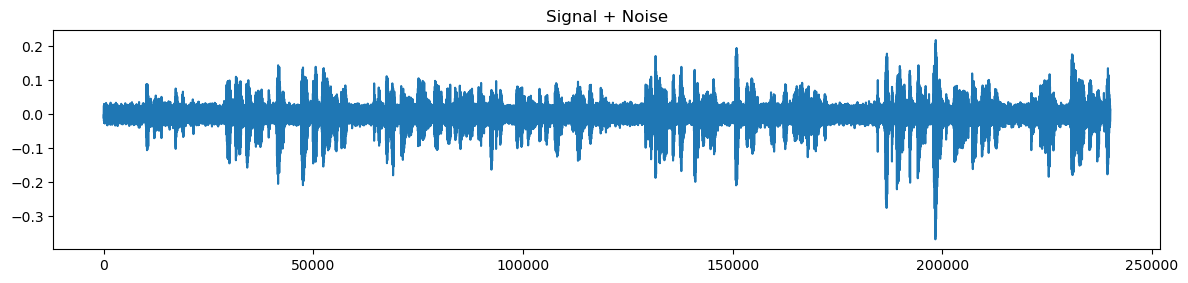

In [74]:
for i, (title,signal) in enumerate(signals, 1):
    plt.figure(figsize=(12,18))
    plt.subplot(7,1,i)
    plt.plot(signal)
    plt.title(title)
    plt.tight_layout()
    plt.show()

### 2. We know that image is a 2D data, which is nothing but a matrix. Apply different matrix transformations on the following image.

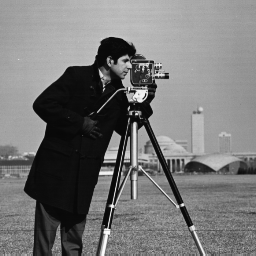

In [75]:
img = Image.open('cameraman.png')
img

### 1.	Is the cameraman coat have any packets in it ? Apply different transformations on this image to visually prove the answer for this question.

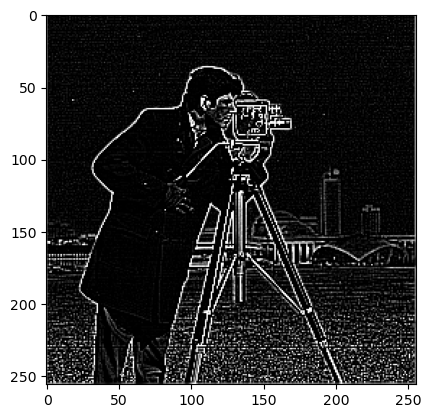

In [76]:
# open the image and find the edges from the image that will help in finding the answer
# open the image and find the edges from the image that will help in finding the answer
edge_image = img.filter(ImageFilter.FIND_EDGES)
plt.imshow(edge_image,cmap='gray')
plt.show()

### 2.	Create the negative version of this image

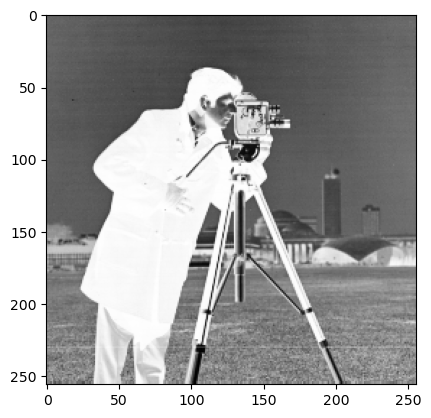

In [77]:
#hint: 255-image graylevel values 
negative_img = 255-np.array(img)
negative_img_pill = Image.fromarray(negative_img)
plt.imshow(negative_img_pill, cmap='gray')
plt.show()

### 3.	Rotate the image by an angles 45deg, 90 deg.

Image rotate by 45deg anticlockwise direction


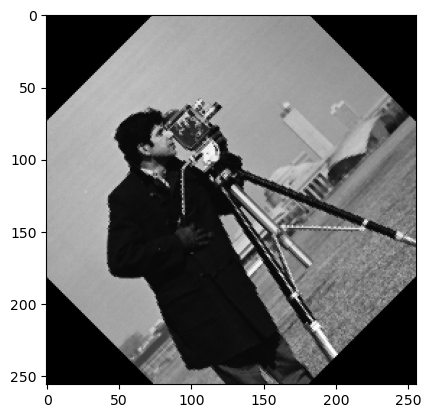

In [78]:
# use image transformation
rotate_image_45 = img.rotate(45)
print(f"Image rotate by 45deg anticlockwise direction")
plt.imshow(rotate_image_45,cmap='gray')
plt.show()

Image rotate by 90deg anticlockwise direction


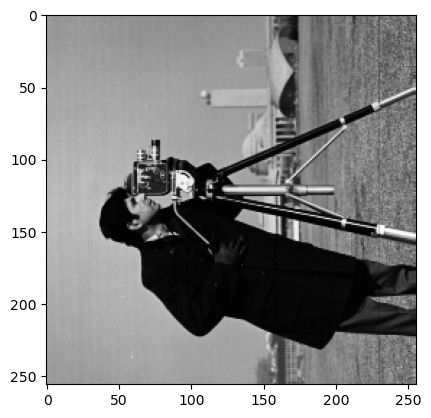

In [79]:
rotate_image_90 = img.rotate(90)
print("Image rotate by 90deg anticlockwise direction")
plt.imshow(rotate_image_90,cmap='gray')
plt.show()

### 4.	Horizontally flip the image

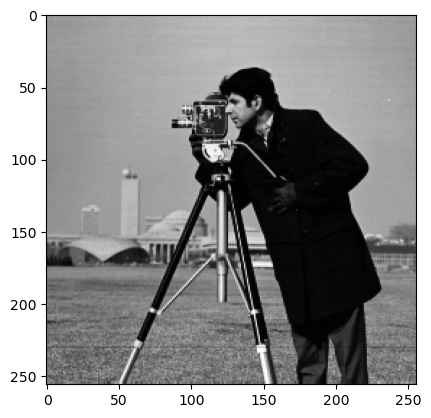

In [80]:
# use image transformation and use vector dot product 
flip_image = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(flip_image,cmap='gray')
plt.show()

5.	Zoom out the image using any matrix interpolation (up-sampling)

In [81]:
# use image transformation and use vector dot product 
zoom_factor = 0.6

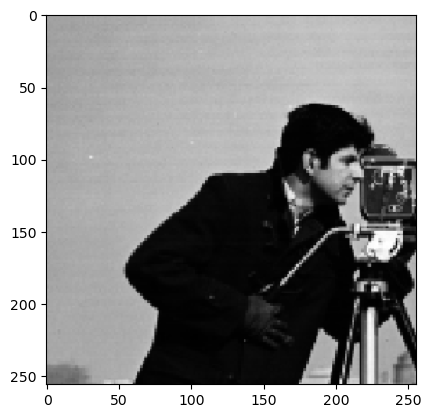

In [82]:
zoom_image = img.transform(img.size,Image.Transform.EXTENT,(0, 0, img.size[0]*zoom_factor, img.size[1]*zoom_factor))
plt.imshow(zoom_image,cmap='gray')
plt.show()

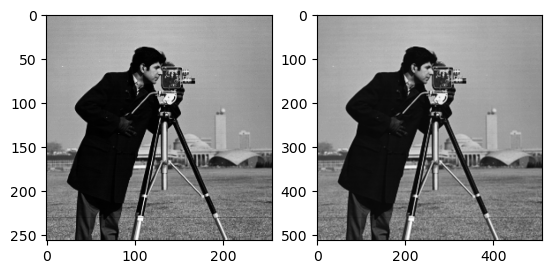

In [83]:
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

result = ndimage.zoom(img, 2.0)
ax1.imshow(img,cmap='gray')
ax2.imshow(result,cmap='gray')
plt.show()

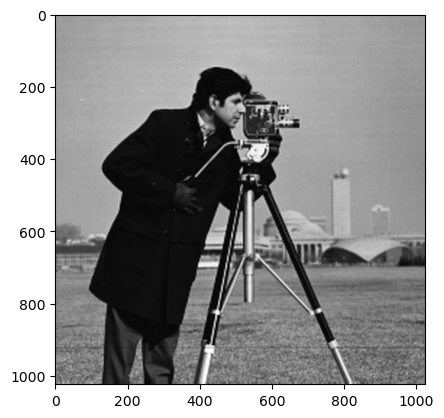

In [84]:
# Rearrange the image (for example, flipping horizontally)
rearranged_img = ndimage.zoom(img,zoom=4)

# Display the rearranged image
plt.imshow(rearranged_img,cmap='gray')
plt.axis()  # Hide axis
plt.show()